### --- Three levels of implementation the Fibonacci sequence  ---
#### Step 1 -> 'def fib1()' The definition as it is fib1 Working up to (~ 40) - exponential growth Recursion Tree issue
#### Step 2 -> 'def fib2()' Use cache. Working inteval up to (~ 8000) after -> maximum recursion depth RecursionError
#### Step 3 -> 'def fib3()' fib3 - Iteretion Working inteval  > 2000000  Restrictions depends from hardware
#### Step 3+ -> 'def fib4()' fib4 - yield generator Working inteval  > 10000000  Restrictions depends from hardware

In [1]:
#  Step 1 Recursion tree issue
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n - 1) + fib1(n - 2)

In [2]:
fib1(8) #fib1(31)

21

In [3]:
#  Step 2 maximum recursion depth RecursionError issue
cache = {}
def fib2(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n - 1) + fib2(n - 2)
    return cache[n]

In [4]:
fib2(300) # fib2(3000)

222232244629420445529739893461909967206666939096499764990979600

In [5]:
#  Step 3 Iteretion way solution. Restrictions depends from hardware.
def fib3(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n-1):
        f0, f1 = f1, f0 + f1
    return f1

In [6]:
fib3 (1000) #fib3(2000000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [7]:
# yield way

In [8]:
def fibonacci(number):
    a = b = 1
    for _ in range(number):
        yield a
        a, b = b, a + b        

In [9]:
def fib4(n):
    x = 0
    fib_number = n
    for num in fibonacci(fib_number):
        x = x + 1
        if x == fib_number:
            return num

### Time compear

In [10]:
import os
import sys
import copy
import inspect
import logging
import matplotlib
from functools import lru_cache


In [11]:
import time
def timed(f, *args, n_iter = 100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [12]:
timed(fib3, 800)

7.310000000004813e-05

In [13]:
from matplotlib import pyplot as plt
def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
    plt.legend()
    plt.grid(True)

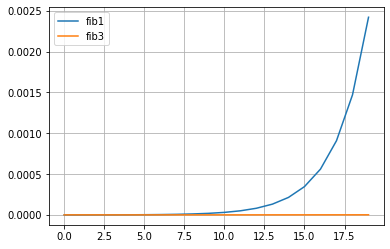

In [14]:
compare([fib1, fib3], list(range(20)))

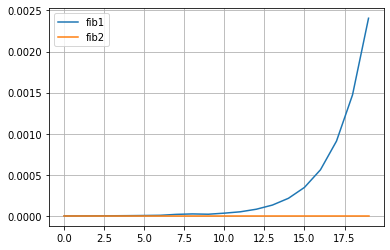

In [15]:
compare([fib1, fib2], list(range(20)))

In [27]:
cache.clear()

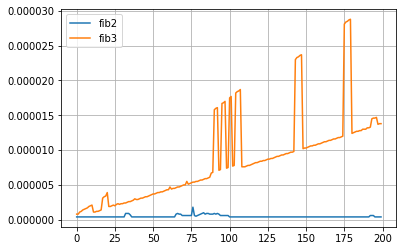

In [29]:
cache.clear()
compare([fib2, fib3], list(range(200)))

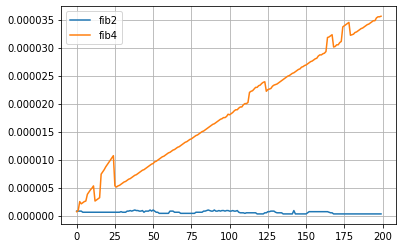

In [30]:
cache.clear()
compare([fib2, fib4], list(range(200)))

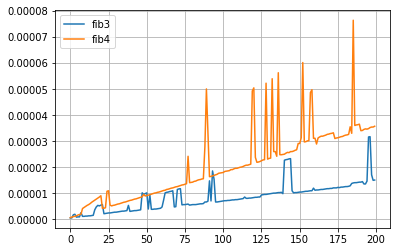

In [31]:
cache.clear()
compare([fib3, fib4], list(range(200)))

#### Recursion Tree Vizualization modul viz(func)
Working from cmd  (pip IPython import rcviz from rcviz import viz)

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 

In [19]:
#fib1(4)

In [20]:
#Image("./fib1.png")

In [21]:
#fib2(5)

In [22]:
#Image("./fib2.png")